# Plot 3.2: Comparison with 5PN Model

Plot Description: 

Phase error comparison with a PN trajectory starting at $p \sim 100$ at mass ratio $10^{−3}$

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from few.trajectory.inspiral import EMRIInspiral

from few.utils.constants import YRSID_SI

#Importing Flux Trajectory
from few.trajectory.ode import KerrEccEqFlux
flux_traj = EMRIInspiral(func=KerrEccEqFlux)

# Importing 5PN Trajectory
from few.trajectory.ode import PN5
PN_traj = EMRIInspiral(func=PN5)

## Single Trajectory Tests

In [15]:
# Mass ratio 1e-5
M = 1e5
mu = 1e2 

p0 = 100. # As stated in figure description
xI0 = 1.  # Fixed for equatorial mode;

# Can play around with these two
a = 0.9  
e0 = 0.1


T = 4.  # duration of trajectory in years (as defined by few.utils.constants.YRSID_SI)

traj_pars = [M, mu, a, p0, e0, xI0]

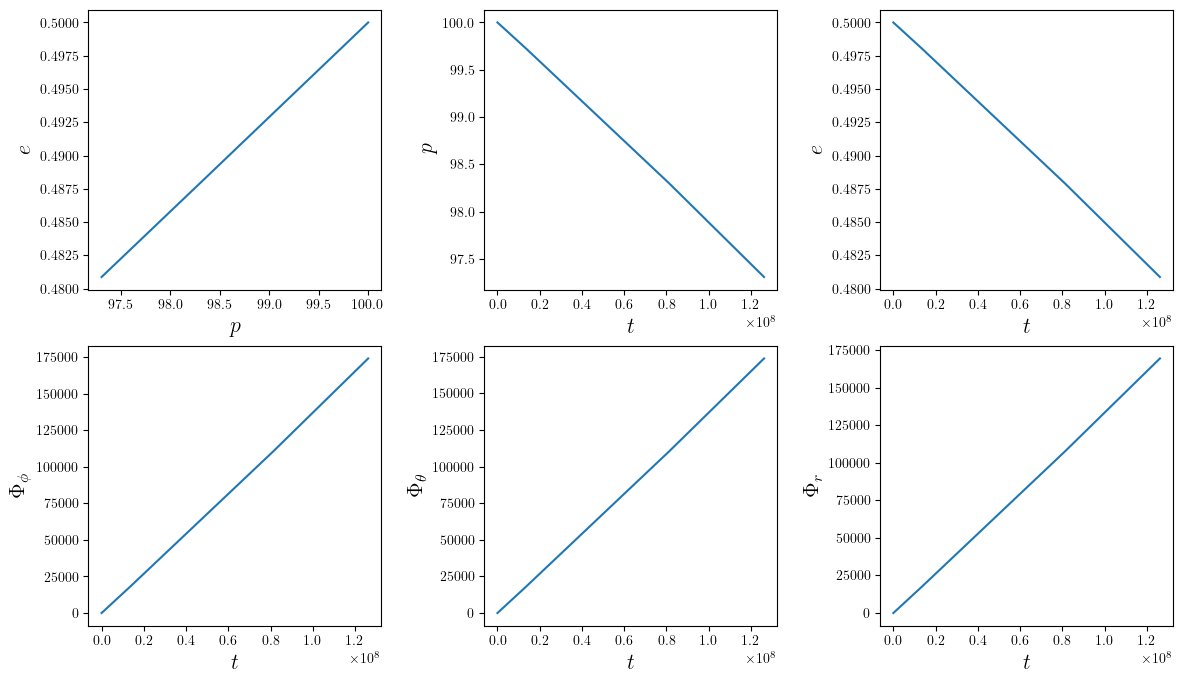

In [ ]:
t, p, e, xI, Phi_phi, Phi_theta, Phi_r = flux_traj(*traj_pars, T=T,err=1e-12)

fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.35)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$', r'$\Phi_\theta$', r'$\Phi_r$']
xlabels = [r'$p$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$']
ys = [e, p, e, Phi_phi, Phi_theta, Phi_r]
xs = [p, t, t, t, t, t]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)

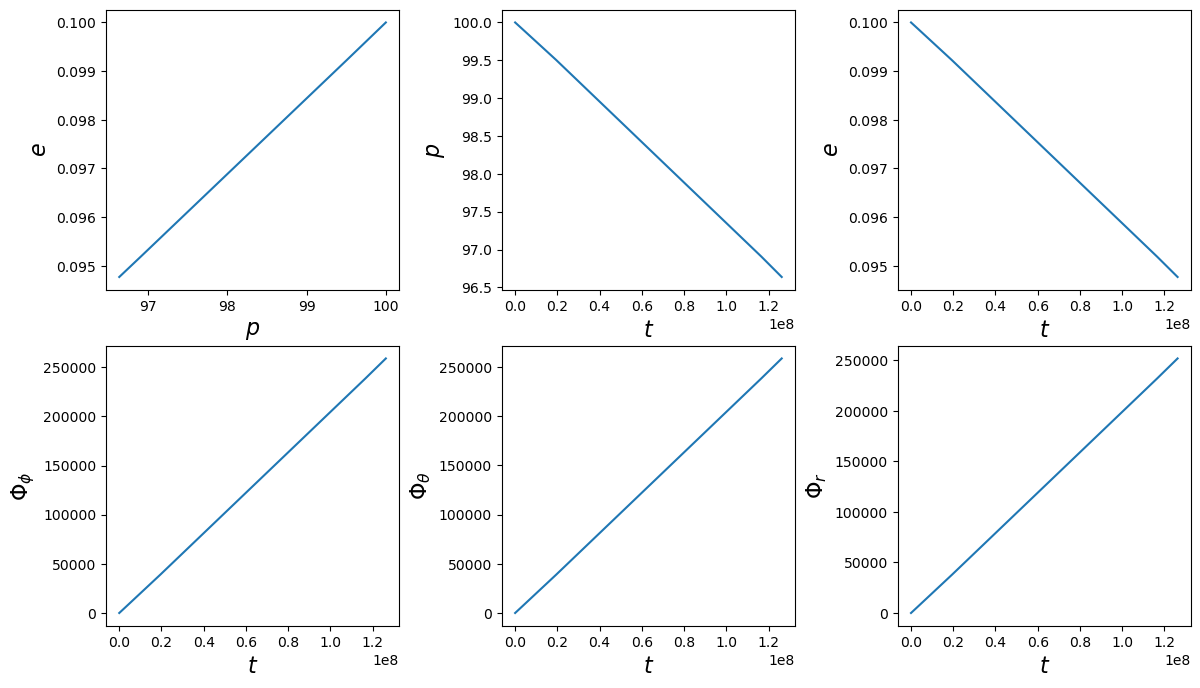

In [17]:
tPN, pPN, ePN, xIPN, Phi_phiPN, Phi_thetaPN, Phi_rPN = PN_traj(*traj_pars, T=T,err=1e-12)

fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.35)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$', r'$\Phi_\theta$', r'$\Phi_r$']
xlabels = [r'$p$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$']
ys = [ePN, pPN, ePN, Phi_phiPN, Phi_thetaPN, Phi_rPN]
xs = [pPN, tPN, tPN, tPN, tPN, tPN]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)

In [18]:
Phi_phi[-1]-Phi_phiPN[-1] # Dephasing

np.float64(-0.0008817158231977373)

## Multiple Trajectories

In [35]:
# Adjust masses (in solar masses) to obtain desired mass ratio
M = 1e6
mu = 1e3 

p0 = 100. # As stated in figure description
xI0 = 1.  # Fixed for equatorial (prograde) mode;

# Want to test for each value of spin from -0.9 to 0.9
aArr = np.arange(-0.95,1,0.05)
# We'll also test different values of eccentricity from 0 to 0.8
eArr = np.arange(0,0.95,0.05)
print(len(aArr),len(eArr))
results = np.zeros((len(eArr) ,len(aArr)) )

# Will always use duration of 4 years, as these signals don't plunge in LISA lifetime
T = 4.  # duration of trajectory in years (as defined by few.utils.constants.YRSID_SI)


for i in range(len(eArr)):
    for j in range(len(aArr)):
        if(aArr[j]<0):
            traj_pars = [M, mu, abs(aArr[j]), p0, eArr[i],  -xI0]
        else:
            traj_pars = [M, mu, aArr[j], p0, eArr[i], xI0]
        #traj_pars = [M, mu, aArr[j], p0, eArr[i], xI0]
        # Calculate Flux Trajectory
        t, p, e, xI, Phi_phi, Phi_theta, Phi_r = flux_traj(*traj_pars, T=T,err=1e-12)
        # Calculate PN trajectory
        tPN, pPN, ePN, xIPN, Phi_phiPN, Phi_thetaPN, Phi_rPN = PN_traj(*traj_pars, T=T,err=1e-12)
        # Get dephasing at the end of the inspiral
        dephasing = np.log10(abs(Phi_phi[-1] - Phi_phiPN[-1]))
        results[i ,j] = dephasing


39 19


Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
Our mode

## Plot

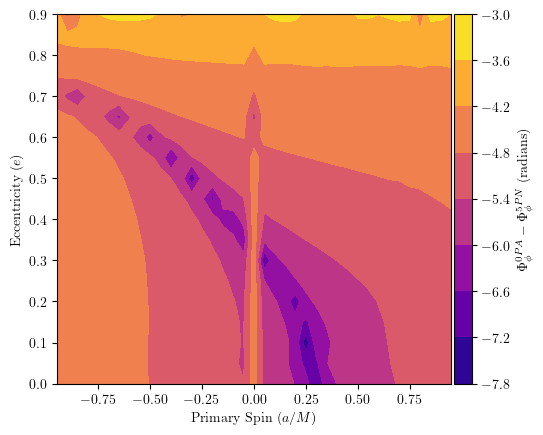

In [36]:
#from seaborn import color_palette
#from matplotlib.colors import ListedColormap
#from seaborn import color_palette


#cmap = ListedColormap(color_palette("colorblind"))

cmap = "plasma"

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]

plt.contourf(aArr,eArr, results, cmap= cmap)
plt.xlabel(r'Primary Spin $(a/M)$')
plt.ylabel(r'Eccentricity $(e)$')
cbar = plt.colorbar( orientation='vertical', fraction=0.2, pad=0.005)
cbar.set_label(r'$ \Phi_\phi^{0PA} - \Phi_\phi^{5PN} $ (radians)')

#plt.savefig("3-2-ComparisonWith5PN.pdf")
plt.show()


Nice!!

So now that we know this works, what's the plot that we want for the paper

- Use Chiristian's switching class an plot \Delta \Phi_\Phi vs p_switch

- Alternatively, we could plot p and e tracks and put the value of \Delta \Phi as a contour plot

## Examining difference in p and e fluxes

In [433]:
from few.trajectory.ode import KerrEccEqFlux
rhsFlux = KerrEccEqFlux()

from few.trajectory.ode import PN5
rhsPN = PN5()


M = 1e6  # Solar masses
mu = 1e1  # Solar masses
# At large p, spin is irrelevant (hopefully)
a = 0.998
x = 1

rhsFlux.add_fixed_parameters(M, mu, a)

rhsPN.add_fixed_parameters(M, mu, a)

#### Generating data acorss the parameter space

In [464]:
ps = np.linspace(40, 200, 50)
es = np.linspace(0.01, 0.9, 50)

pdotsRelDiff = np.zeros((len(ps), len(es)))
edotsRelDiff = np.zeros((len(ps), len(es)))

FluxRelDiff = np.zeros((len(ps), len(es),2))

for i in range(len(es)):
    for j in range(len(ps)):
        pdot, edot, xIdot, Omega_phi, Omega_theta, Omega_r = rhsFlux([ps[j], es[i], x])
        pdotPN, edotPN, xIdotPN, Omega_phiPN, Omega_thetaPN, Omega_rPN = rhsPN([ps[j], es[i], x])
        pdotsRelDiff[i, j] = np.log10(abs(1 - pdot/pdotPN))
        edotsRelDiff[i, j] = np.log10(abs(1 - edot/edotPN))


np.savetxt("PNComparisonPdot.txt", pdotsRelDiff)
np.savetxt("PNComparisonEdot.txt", edotsRelDiff)


### Contour Plots

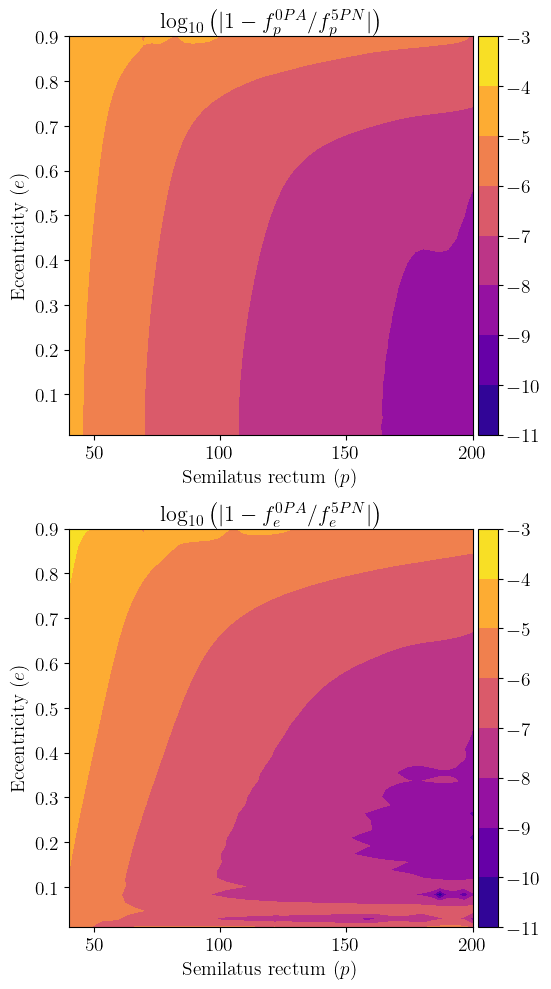

In [ ]:
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]



level_list = [ -11,-10,-9,-8,-7,-6, -5,-4, -3]
#level_list = [ 1e-11,1e-9,1e-7, 1e-5, 1e-3]
#tick_list = [ '$10^{-11}$', '$10^{-9}$', '$10^{-7}$',  '$10^{-5}$',  '$10^{-3}$']
vmin = min(level_list)
vmax = max(level_list)
levels = np.array(level_list)

label_fontsize = 14
tick_fontsize = 14
title_fontsize = 16

fig, axs = plt.subplots(2, 1, figsize=(6,10))  # Create 1x2 subplots
ax1 = axs[0]
ax2 = axs[1]

pdotsRelDiffLoaded = np.loadtxt("PNComparisonPdot.txt")
edotsRelDiffLoaded = np.loadtxt("PNComparisonEdot.txt")

contourf1 = ax1.contourf(ps, es, pdotsRelDiffLoaded, cmap='plasma',levels=levels,vmin=vmin, vmax=vmax)
ax1.set_xlabel(r'Semilatus rectum $(p)$', fontsize=label_fontsize)
ax1.set_ylabel(r'Eccentricity $(e)$', fontsize=label_fontsize)
ax1.set_title(r'$ \log_{10} \left(| 1 - f_p^{0PA}/ f_p^{5PN} | \right)$', fontsize=title_fontsize)

ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)

contourf2 = ax2.contourf(ps, es, edotsRelDiffLoaded, cmap='plasma',levels=levels,vmin=vmin, vmax=vmax)
ax2.set_xlabel(r'Semilatus rectum $(p)$', fontsize=label_fontsize)
ax2.set_ylabel(r'Eccentricity $(e)$', fontsize=label_fontsize)
ax2.set_title(r'$ \log_{10} \left(| 1 - f_e^{0PA}/ f_e^{5PN} | \right)$', fontsize=title_fontsize)
ax2.tick_params(axis='both', which='major', labelsize=tick_fontsize)


cbar = fig.colorbar(contourf1, ax=ax1, orientation='vertical', fraction=0.2, pad=0.01, ticks=level_list)
cbar.ax.tick_params(labelsize=tick_fontsize)
cbar = fig.colorbar(contourf2, ax=ax2, orientation='vertical', fraction=0.2, pad=0.01, ticks=level_list)
cbar.ax.tick_params(labelsize=tick_fontsize)

plt.tight_layout()
#plt.savefig("ComparisonWith5PN.pdf")
plt.show()

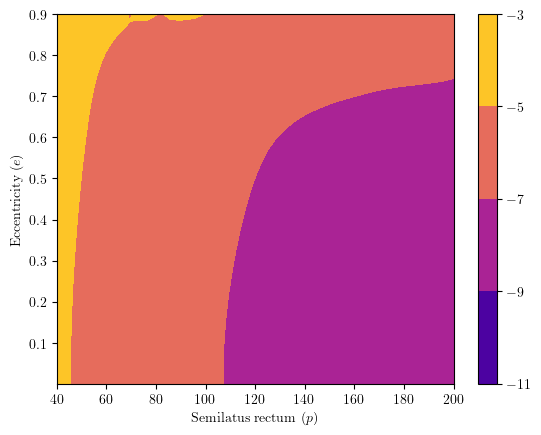

In [463]:
plt.contourf(ps, es, pdotsRelDiff, cmap='plasma',levels=levels,vmin=vmin, vmax=vmax)
plt.xlabel(r'Semilatus rectum $(p)$')
plt.ylabel(r'Eccentricity $(e)$')
plt.colorbar()

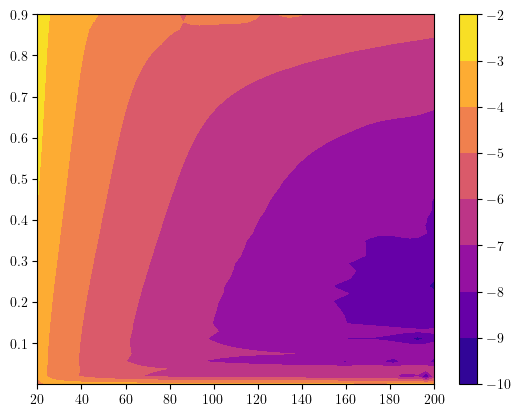

In [ ]:
plt.contourf(ps, es, edotsRelDiff, cmap='plasma',levels=levels,vmin=vmin, vmax=vmax)
plt.xlabel(r'Semilatus rectum $(p)$')
plt.ylabel(r'Eccentricity $(e)$')
plt.colorbar()

# When should we switch from 5 PN to Interpolated Fluxes?

In [218]:
from few.trajectory.ode.pn5 import dpdt8H_5PNe10, dedt8H_5PNe10

class KerrEccEqFluxwithPNOuter(KerrEccEqFlux):
    def modify_rhs(self, ydot: np.ndarray, y: np.ndarray, **kwargs) -> np.ndarray:
        if self.additional_args[1] == 0.:
            if y[0] >=  self.additional_args[0]:
                ydot[0] = dpdt8H_5PNe10(self.a, y[0], y[1], y[2], 10, 10)
                ydot[1] = dedt8H_5PNe10(self.a, y[0], y[1], y[2], 10, 8)
            else:
                self.additional_args[1] = 1.

        return ydot

In [219]:
switch_traj = EMRIInspiral(func=KerrEccEqFluxwithPNOuter)

In [220]:
## Single inspiral test

# Mass ratio 1e-5
M = 1e5
mu = 1e3 

q = mu/M

p0 = 150. # As stated in figure description
xI0 = 1.  # Fixed for equatorial mode;

# Can play around with these two
a = 0.99  
e0 = 0.9


T = 100.  # duration of trajectory in years (as defined by few.utils.constants.YRSID_SI)

traj_pars = [M, mu, a, p0, e0, xI0]

In [221]:
t, p, e, xI, Phi_phi, Phi_theta, Phi_r = flux_traj(*traj_pars, T=T,err=1e-12)

In [222]:
tPN, pPN, ePN, xIPN, Phi_phiPN, Phi_thetaPN, Phi_rPN = PN_traj(*traj_pars, T=T,err=1e-12)

In [235]:
tSw, pSw, eSw, xISw, Phi_phiSw, Phi_thetaSw, Phi_rSw = switch_traj(*traj_pars,35.,0., T=T,err=1e-12)

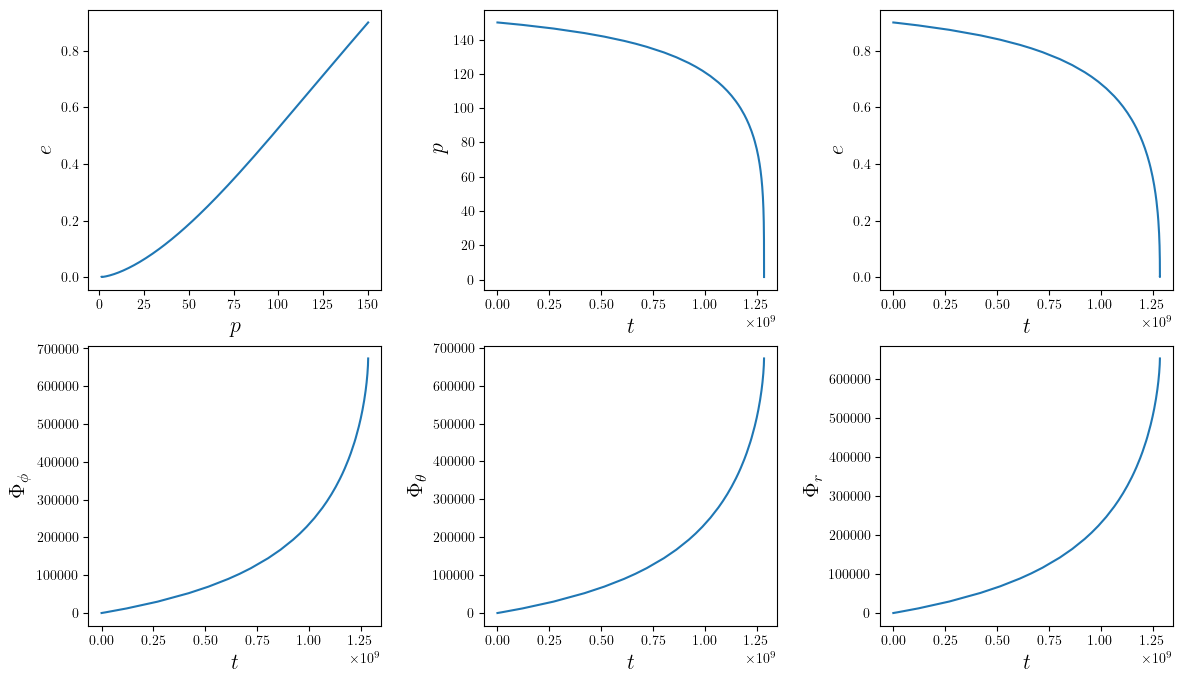

In [236]:
fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.35)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$', r'$\Phi_\theta$', r'$\Phi_r$']
xlabels = [r'$p$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$']
ys = [eSw, pSw, eSw, Phi_phiSw, Phi_thetaSw, Phi_rSw]
xs = [pSw, tSw, tSw, tSw, tSw, tSw]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)

In [237]:
 (q *(Phi_phiSw[-1] - Phi_phiPN[-1]), q *( Phi_phiSw[-1] - Phi_phi[-1]))

(np.float64(4.321022827730048), np.float64(-0.00722710510250181))

In [181]:
(q *(Phi_phiSw[-1] - Phi_phiPN[-1]), q *( Phi_phiSw[-1] - Phi_phi[-1]))

(np.float64(2.6847411699371877), np.float64(-0.034850425677141174))

### Multiple Trajectories

In [240]:
# Mass ratio 1e-5
M = 1e5
mu = 1e3 

q = mu/M

p0 = 120. # As stated in figure description
xI0 = 1.  # Fixed for equatorial, prograde;

# Can play around with these two
a = 0.99  
e0 = 0.9

traj_pars = [M, mu, a, p0, e0, xI0]


T = 100.  # duration of trajectory in years (as defined by few.utils.constants.YRSID_SI)

t, p, e, xI, Phi_phi, Phi_theta, Phi_r = flux_traj(*traj_pars, T=T,err=1e-12)


pSwitches = np.arange(15,100,10)

results = np.zeros(len(pSwitches))

for i in range(len(pSwitches)):
    tSw, pSw, eSw, xISw, Phi_phiSw, Phi_thetaSw, Phi_rSw = switch_traj(*traj_pars,pSwitches[i],0., T=T,err=1e-12)
    results[i] = abs( q *( Phi_phiSw[-1] - Phi_phi[-1]))
    print(pSwitches[i],results[i])
    



15 0.08730003027128987
25 0.020590866239508614
35 0.007531635986524635
45 0.004991586884134449
55 0.0036508570093428715
65 0.0023503120068926364
75 0.001845189110026695
85 0.0013577190908836201
95 0.0012788112682756037


In [241]:
(t[-1] / YRSID_SI, p[-1])

(np.float64(16.715228408864274), np.float64(1.4574815758940194))

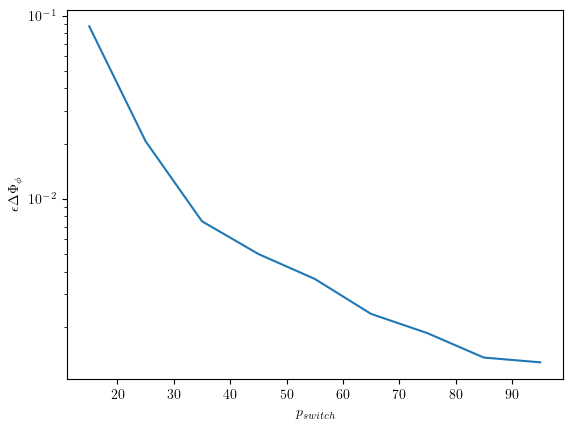

In [242]:
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]

plt.plot(pSwitches,results)
plt.yscale('log')
plt.xlabel(r'$p_{switch}$')
plt.ylabel(r'$ \epsilon \Delta \Phi_\phi$')

plt.show()

# Contour plot of the differences in the fluxes

So lets make a contour plot of the relative difference between the pdot and edot for large p >20. x axis: p, y axis:  e. Spin should not influence these plots significantly. Want to show convergence with p and e up to some numerical noise on a log plot.